# Inventory Data Analysis

Historic data from popular health and beauty retailer and pharmacy chain Boots, is analysed on the following:
Analysis of inventory trends over time.
Identification of popular products based on sales frequency.
Inventory turnover analysis.
Stockouts and replenishment analysis.
inventory trends over time, Identifying top-selling items and stores.
Seasonal variations in sales.


### Import Libraries and Create Dataframes

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [57]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import folium
from geopy.geocoders import Nominatim

In [26]:
products_df = pd.read_csv(r"data/Product_Master.csv")
inventory_df = pd.read_csv(r"data/Inventory_data.csv")
sales_df = pd.read_csv(r"data/Sales_service_data.csv")
store_df = pd.read_csv(r"data/Store_ref.csv")

### Data Frames

There are four data frames  :
1. products_df 
2. inventory_df
3. store_df
4. sales_df

In [27]:
display(products_df.head(3))
display(inventory_df.head(3))
display(sales_df.head(3))
display(store_df.head(3))


,Unique_Product_ID,Business_Area,Category,Cost_price,Retail_price
0,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097
1,Product 2,BEAUTY,Beauty Accessories,3.6153,14.5500
2,Product 3,BEAUTY,Beauty Accessories,0.2310,2.9100


,Unique Store_ID,Unique Product_ID,23.11.2019,30.11.2019,07.12.2019,14.12.2019,21.12.2019,28.12.2019,04.01.2020,11.01.2020,18.01.2020,25.01.2020,01.02.2020,08.02.2020,15.02.2020
0,Store 1,Product 772,5,4,5,8,5,4,2,8,7,6,6,0,2
1,Store 1,Product 598,12,13,9,9,10,9,6,6,4,4,10,10,2
2,Store 1,Product 590,13,8,10,8,5,1,5,3,7,6,10,4,6


,Item,Unique_Store_ID,Week Ending,Sales Units,SL%
0,Product 772,Store 1,20191123,2,1.0
1,Product 772,Store 1,20191130,1,1.0
2,Product 772,Store 1,20191207,5,1.0


,Unique_store_ID,Store_format,Distribution_Centre,No. deliveries per week
0,Store 1,Flagship,NOTTM,6
1,Store 2,LP,NOTTM,2
2,Store 3,H&B,NOTTM,6


In [28]:
sales_df

,Item,Unique_Store_ID,Week Ending,Sales Units,SL%
0,Product 772,Store 1,20191123,2,1.0
1,Product 772,Store 1,20191130,1,1.0
2,Product 772,Store 1,20191207,5,1.0
3,Product 772,Store 1,20191214,3,1.0
4,Product 772,Store 1,20191221,3,1.0
...,...,...,...,...,...
392107,Product 364,Store 80,20191221,1,1.0
392108,Product 364,Store 80,20191228,0,0.0
392109,Product 364,Store 80,20200111,1,1.0
392110,Product 364,Store 80,20200125,2,1.0


## Data Cleaning

The data set didn't require much cleaning sequence, only required to rename columns  Unique Store_ID, Unique, Product_ID as Product_ID and Store_ID

Renamed the columns Unique Store_ID, Unique Product_ID as Product_ID and Store_ID

In [29]:
products_df.rename(columns={"Unique_Product_ID": "Product_ID"}, inplace = True)

In [30]:

inventory_df.rename(columns={"Unique Product_ID": "Product_ID","Unique Store_ID":"Store_ID"}, inplace = True)

Added new column 'Total' to inventory_df to hold the total number of each products over the weeks. 

In [31]:
inventory_df['Total'] = inventory_df['23.11.2019']+inventory_df['30.11.2019']+inventory_df['07.12.2019']\
                    +inventory_df['14.12.2019']+inventory_df['21.12.2019']+inventory_df['28.12.2019']\
                    +inventory_df['04.01.2020']+inventory_df['11.01.2020']+inventory_df['18.01.2020']\
                    +inventory_df['25.01.2020']+inventory_df['01.02.2020']+inventory_df['08.02.2020']+inventory_df['15.02.2020']
inventory_df.min()

Store_ID        Store 1
Product_ID    Product 1
23.11.2019          -10
30.11.2019           -4
07.12.2019           -5
14.12.2019           -5
21.12.2019           -5
28.12.2019           -7
04.01.2020           -3
11.01.2020           -4
18.01.2020          -10
25.01.2020          -54
01.02.2020          -99
08.02.2020         -103
15.02.2020         -119
Total               -17
dtype: object

In [32]:
inventory_df.shape[0]

53519

Renamed Unique_Store_ID as Store_ID in sales_df.

In [33]:
store_df = store_df.rename(columns={"Unique_store_ID": "Store_ID"})

Checking for Null values

In [34]:
store_df.isnull().sum()

Store_ID                   0
Store_format               0
Distribution_Centre        0
No. deliveries per week    0
dtype: int64

In [35]:
sales_df.rename(columns = {'Unique_Store_ID':'Store_ID'},inplace =True)
sales_df['Week Ending'] =  pd.to_datetime(sales_df['Week Ending'], format='%Y%m%d')

In [36]:
sales_df.isnull().sum()

Item           0
Store_ID       0
Week Ending    0
Sales Units    0
SL%            0
dtype: int64

In [37]:
products_df.describe()

,Cost_price,Retail_price
count,991.000000,991.000000
mean,2.358444,6.249531
std,2.269851,5.672708
min,0.049400,0.009700
25%,1.042350,2.900300
50%,1.699500,4.258300
75%,2.811350,7.750300
max,23.819400,53.340300


In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     991 non-null    object 
 1   Business_Area  991 non-null    object 
 2   Category       991 non-null    object 
 3   Cost_price     991 non-null    float64
 4   Retail_price   991 non-null    float64
dtypes: float64(2), object(3)
memory usage: 38.8+ KB


In [39]:
products_df.isnull().sum().sum()

0

In [40]:


products_df.duplicated().sum()

0

### Exploratory Data Analysis

Pie chart showing the Category of products in products_df

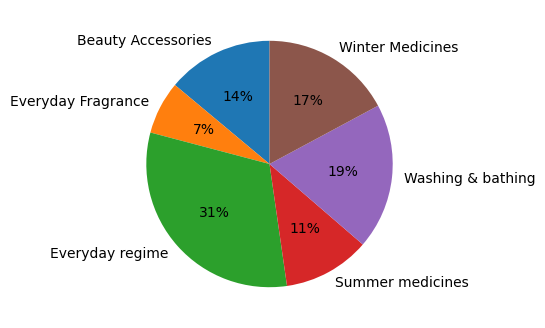

In [10]:
pi = products_df[["Product_ID"]].groupby(products_df["Category"]).count()
fig = plt.figure(figsize=(4,4),dpi=100)
plt.pie(pi["Product_ID"],labels=pi.index,autopct="%1.0f%%",startangle=90)
plt.show()

In [11]:
#Check Sales_df for Dtypes, nullvalues
sales_df.info()
sales_df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392112 entries, 0 to 392111
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Item             392112 non-null  object 
 1   Unique_Store_ID  392112 non-null  object 
 2   Week Ending      392112 non-null  int64  
 3   Sales Units      392112 non-null  int64  
 4   SL%              392112 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 15.0+ MB


0

Merging the dataframes products_df and sales_df to calculate Revenue and Gross Profit.

In [41]:
df = products_df.merge(sales_df, how='inner',left_on ='Product_ID', right_on='Item')
df['Revenue'] =df['Retail_price']*df['Sales Units']
df['Gross Profit'] = df['Retail_price']-df['Cost_price']
df.drop('Item',axis =1, inplace = True)
display(df.head(2))
print(df.shape)

,Product_ID,Business_Area,Category,Cost_price,Retail_price,Store_ID,Week Ending,Sales Units,SL%,Revenue,Gross Profit
0,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-23,4,1.0,0.0388,-2.2317
1,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-30,1,1.0,0.0097,-2.2317


(392112, 11)


C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


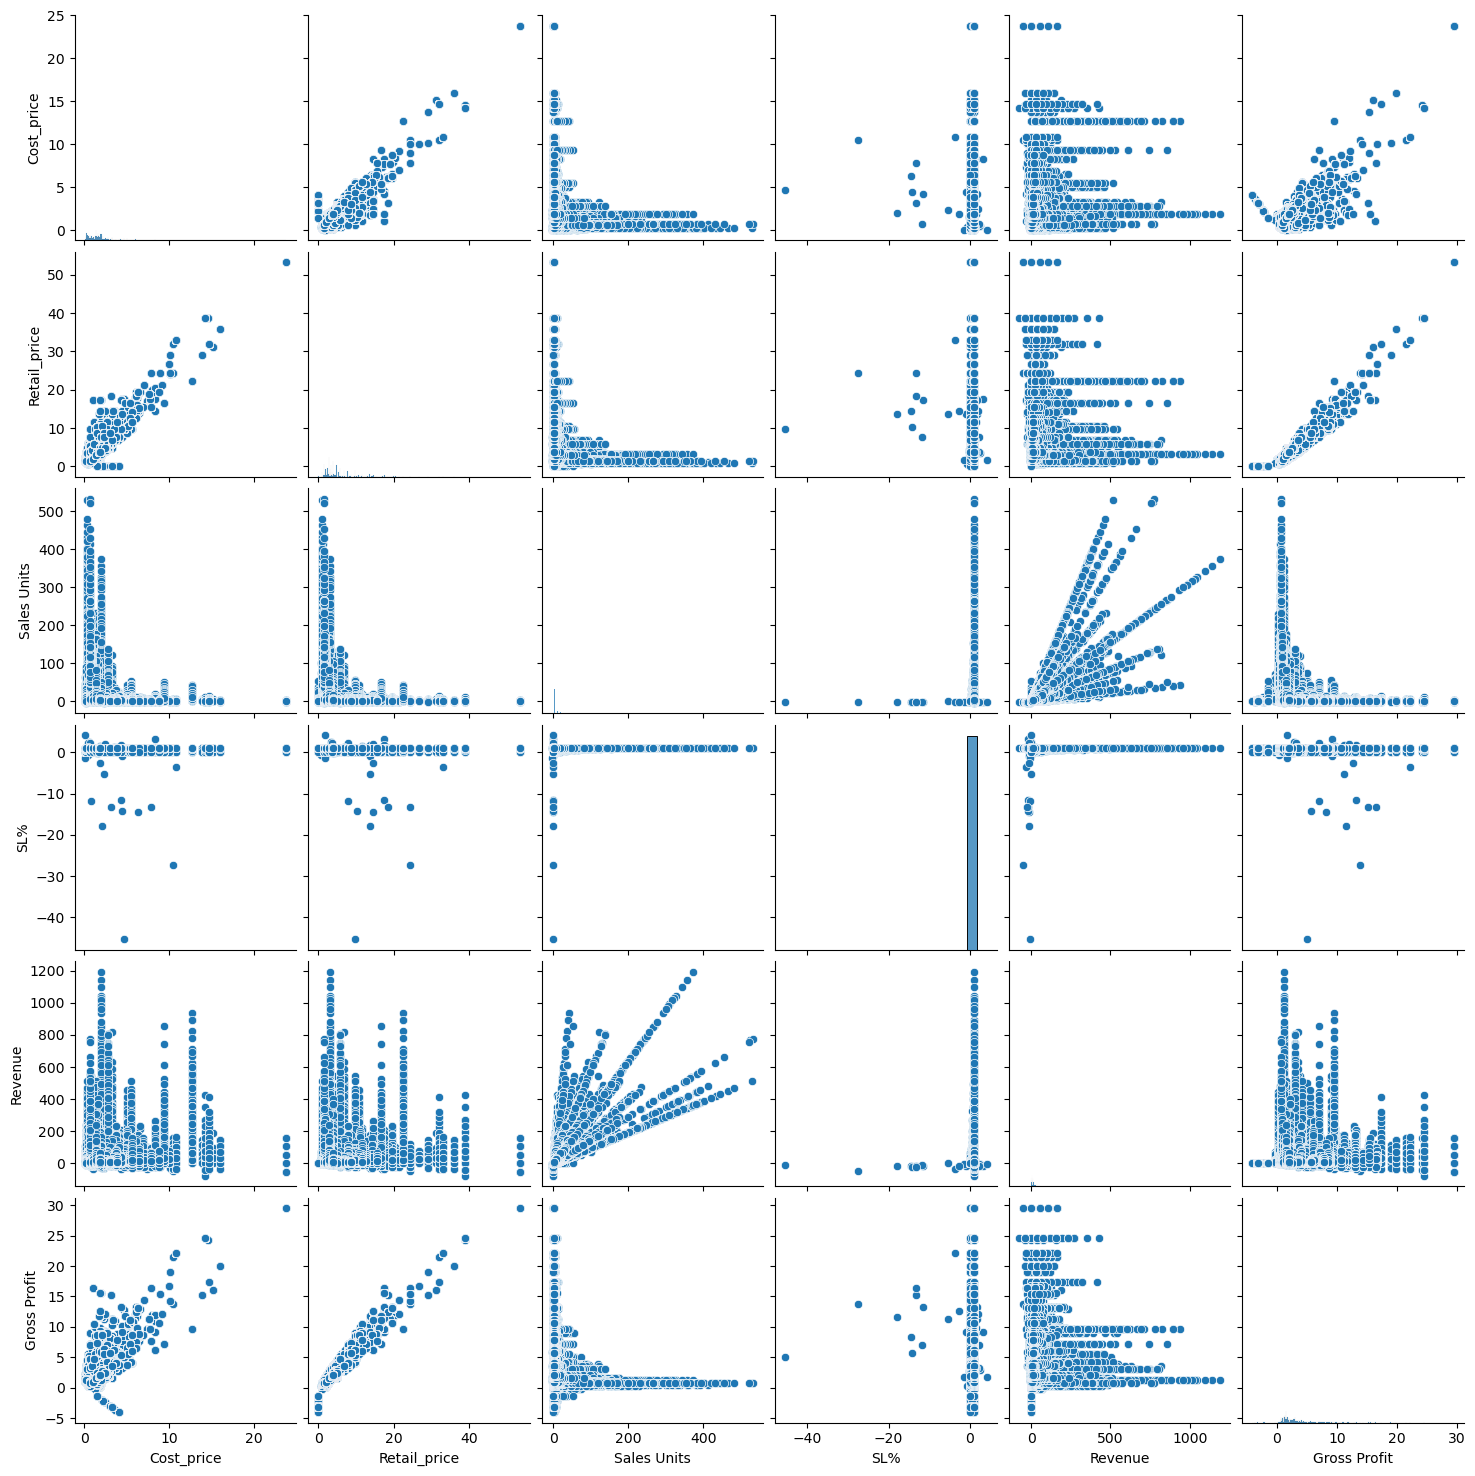

In [23]:
sns.pairplot(df)

### Distribution of Products by Category and Business Area

In [42]:
count = df.groupby('Business_Area')['Category'].value_counts()
count

Business_Area  Category          
BEAUTY         Beauty Accessories     43748
               Everyday Fragrance     10137
HEALTHCARE     Winter Medicines       79298
               Summer medicines       51045
TOILETRIES     Everyday regime       127566
               Washing & bathing      80318
Name: count, dtype: int64

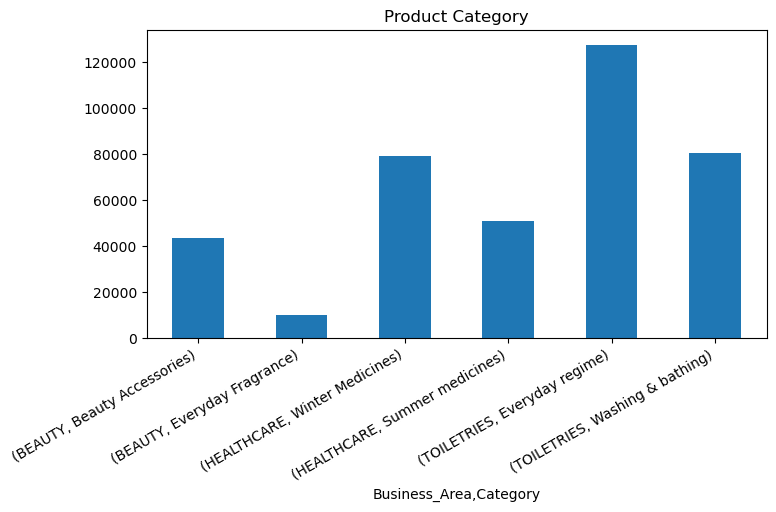

In [25]:
count.plot( kind='bar',stacked=True, title = 'Product Category', figsize=(8, 4))
plt.xticks(rotation =30,ha ='right')
plt.show()

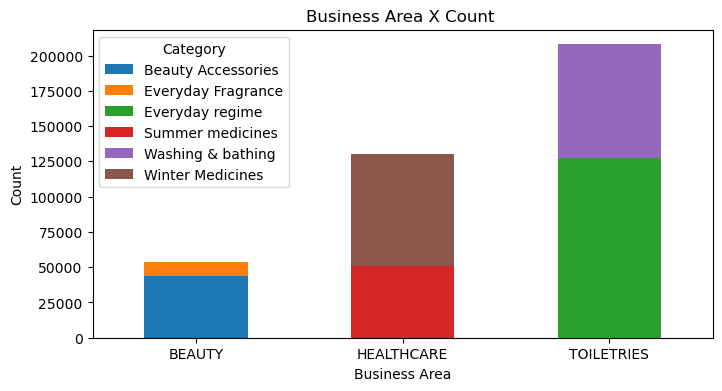

In [43]:
count.unstack().plot(kind='bar', stacked = True, figsize=(8, 4))
plt.title('Business Area X Count ')
plt.xlabel('Business Area')
plt.ylabel('Count')
plt.xticks(rotation =0)
#plt.legend(bbox_to_anchor=(1.0, 1.0), title='Category')
plt.show()

In [44]:
df.head()

,Product_ID,Business_Area,Category,Cost_price,Retail_price,Store_ID,Week Ending,Sales Units,SL%,Revenue,Gross Profit
0,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-23,4,1.0,0.0388,-2.2317
1,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-30,1,1.0,0.0097,-2.2317
2,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-07,2,1.0,0.0194,-2.2317
3,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-14,4,1.0,0.0388,-2.2317
4,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-21,3,1.0,0.0291,-2.2317


In [45]:
df.duplicated().sum().sum()

0

In [46]:
df.shape[0]

392112

# Analysis and Visualisation

#### SL% (Service Level % ) :
In inventory management, service level is the expected probability of not hitting a stock-out during the next replenishment cycle or the probability of not losing sales.

For performance, your STR is the measurement of monthly sales against a given target.

SL% = No.of Quantities delivered in time/ Total quantity od damand

Companies set their goals at the service level of 95% because the level of service is a key factor inassuring the fidelity of the customers.


In [47]:
good_product = df[df['SL%']>=0.95]
good_product

,Product_ID,Business_Area,Category,Cost_price,Retail_price,Store_ID,Week Ending,Sales Units,SL%,Revenue,Gross Profit
0,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-23,4,1.0,0.0388,-2.2317
1,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-30,1,1.0,0.0097,-2.2317
2,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-07,2,1.0,0.0194,-2.2317
3,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-14,4,1.0,0.0388,-2.2317
4,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-21,3,1.0,0.0291,-2.2317
...,...,...,...,...,...,...,...,...,...,...,...
392107,Product 991,TOILETRIES,Everyday regime,1.8569,3.8703,Store 79,2020-01-11,2,1.0,7.7406,2.0134
392108,Product 991,TOILETRIES,Everyday regime,1.8569,3.8703,Store 79,2020-01-18,1,1.0,3.8703,2.0134
392109,Product 991,TOILETRIES,Everyday regime,1.8569,3.8703,Store 79,2020-01-25,1,1.0,3.8703,2.0134
392110,Product 991,TOILETRIES,Everyday regime,1.8569,3.8703,Store 79,2020-02-01,1,1.0,3.8703,2.0134


### Overstock and Understock

Products with service level less than 95% is considered to be overstocked and grater than 1 is considered to be understocked.

In [51]:
under_stock = df[df['SL%']>=1] 
under_stock.shape[0]

349834

In [52]:
over_stock = df[df['SL%']<=0.95]
over_stock.shape[0]

36186

Calculating percentage of overstocked and understocked products.

In [53]:
over_stock_percentage = over_stock.shape[0]/df.shape[0]*100
over_stock_percentage

9.228485738768514

In [54]:
under_stock_percentage = under_stock.shape[0]/df.shape[0]*100
under_stock_percentage

89.21787652507447

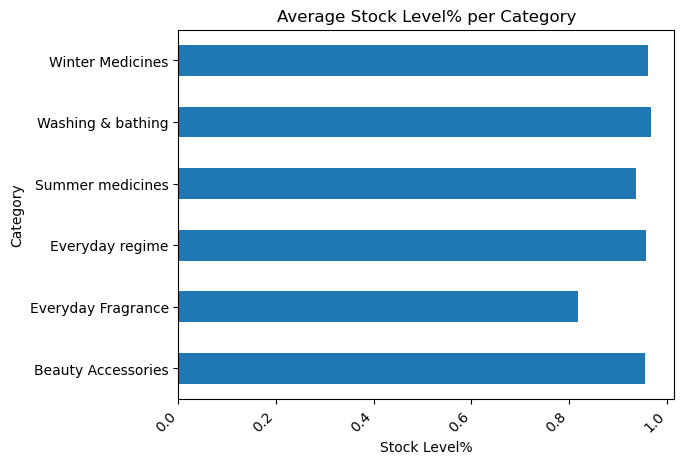

In [55]:
sl =df.groupby('Category')['SL%'].mean().plot( kind='barh',stacked=True, xlabel='Stock Level%', title='Average Stock Level% per Category')
plt.xticks(rotation =45,ha ='right')
plt.show()


### Plotting Sales Units  

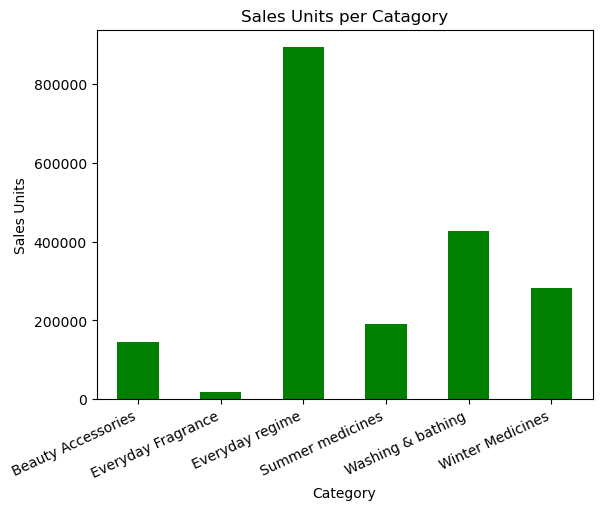

In [37]:
df.groupby('Category')['Sales Units'].sum().plot(ylabel='Sales Units',title='Sales Units per Catagory', kind='bar', color ='Green');
plt.xticks(rotation =25,ha ='right')
plt.show()

In [38]:
#Formatting Week Ending column
df['Week Ending'] = pd.to_datetime(df['Week Ending'],format='%Y%m%d', errors='coerce')
df['Week Ending'] = df['Week Ending'].dt.date

In [39]:
temp = df[['Business_Area', 'Week Ending','Sales Units']]
temp.head(3)

,Business_Area,Week Ending,Sales Units
0,BEAUTY,2019-11-23,4
1,BEAUTY,2019-11-30,1
2,BEAUTY,2019-12-07,2


In [40]:
temp = temp.groupby(['Business_Area','Week Ending'])['Sales Units'].mean().to_frame()
temp.reset_index(inplace=True)
temp.head()

,Business_Area,Week Ending,Sales Units
0,BEAUTY,2019-11-23,2.941335
1,BEAUTY,2019-11-30,3.096333
2,BEAUTY,2019-12-07,3.208814
3,BEAUTY,2019-12-14,3.277379
4,BEAUTY,2019-12-21,3.571178


### Sales Units per Week Ending categorised by Business Area

C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


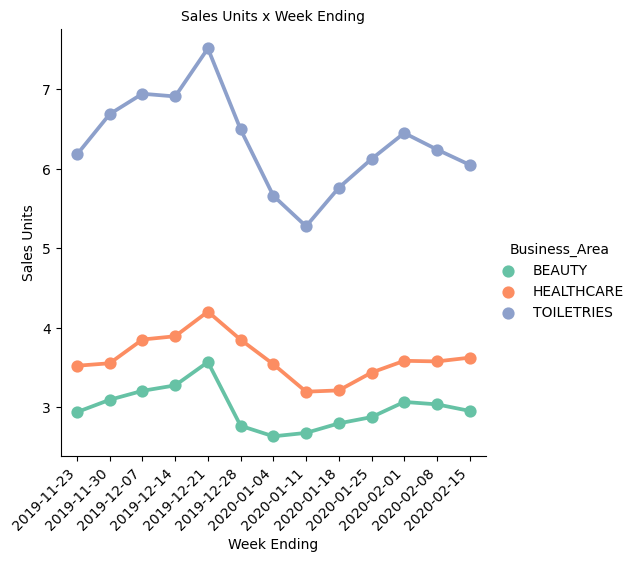

In [41]:
ax = sns.catplot(x="Week Ending", y="Sales Units", hue="Business_Area",palette ='Set2',data=temp,kind='point' )
sns.color_palette("hls", 8)
plt.xlabel('Week Ending')
plt.ylabel('Sales Units')
plt.xticks(rotation=45, horizontalalignment ='right')
plt.title("Sales Units x Week Ending", size=10)
plt.show()

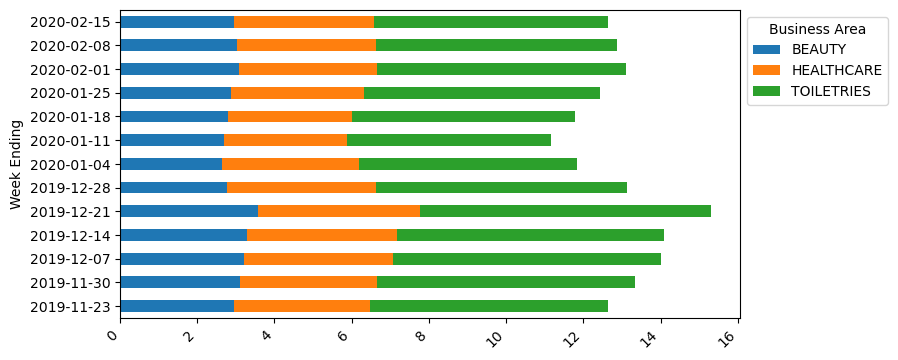

In [42]:
sales_week = df.groupby(['Week Ending', 'Business_Area'])['Sales Units'].mean()
sales_week.unstack().plot(kind='barh', stacked = True, figsize=(8, 4))
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')

Toiletries as sold much higher than Beauty and Healthcare products

## Average Revenue

#### Plotting Average Revenue per Week

<Axes: title={'center': 'Average Weekly Sale'}, xlabel='Week Ending', ylabel='Revenue'>

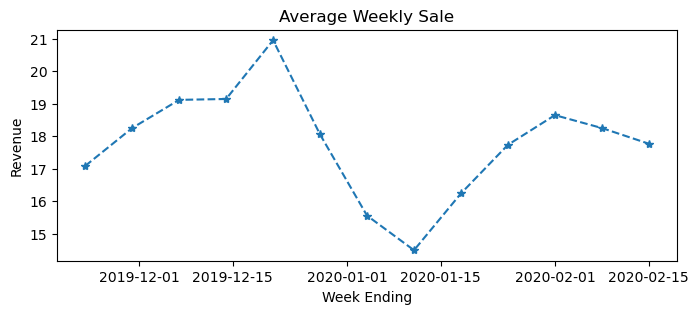

In [43]:
temp = temp.groupby(['Business_Area','Week Ending'])['Sales Units'].mean().to_frame()
temp.reset_index(inplace=True)
temp.head()
df.groupby('Week Ending')['Revenue'].mean().plot(kind = 'line', ylabel = 'Revenue',figsize = (8,3), title='Average Weekly Sale',marker='*',linestyle='--')

(array([0, 1, 2]),
 [Text(0, 0, 'BEAUTY'), Text(1, 0, 'HEALTHCARE'), Text(2, 0, 'TOILETRIES')])

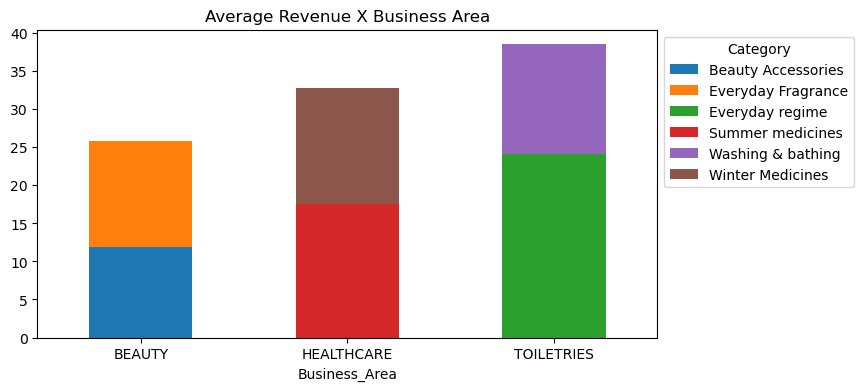

In [44]:
#new = df[['Business_Area','Category','Week Ending','Net_Sale']]
new = df.groupby(['Business_Area','Category'])['Revenue'].mean()
new.unstack().plot(kind='bar', stacked = True, figsize=(8, 4), title ='Average Revenue X Business Area')
plt.legend(bbox_to_anchor=(1.0, 1.0), title ='Category')
plt.xticks(rotation = 0)


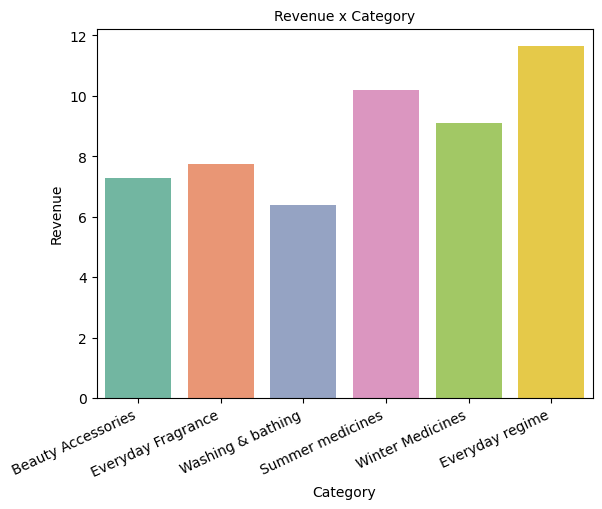

In [45]:
g = sns.barplot(x= 'Category', y ='Revenue',data =df, palette ='Set2' , estimator =np.median, errorbar=None)
plt.xticks(rotation=25, horizontalalignment ='right')
plt.title("Revenue x Category", size=10)
plt.show()


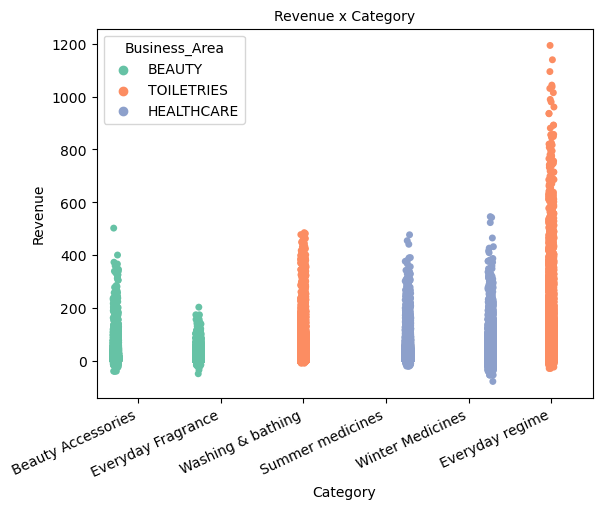

In [46]:
g =sns.stripplot(x= 'Category', y ='Revenue',data =df, palette ='Set2', jitter =True, hue = 'Business_Area', dodge=True)
plt.xticks(rotation=25, horizontalalignment ='right')
plt.title("Revenue x Category", size=10)
#plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')
plt.show()

Higher sold category is Everyday Regime and lowest sold is Everyday Fragrance

#### Gross Profit plot

In [47]:
profit = df[['Business_Area','Category', 'Week Ending','Gross Profit']]
profit = profit.groupby(['Business_Area','Category','Week Ending'])['Gross Profit'].mean().to_frame()
profit.reset_index(inplace=True)
profit.head()

,Business_Area,Category,Week Ending,Gross Profit
0,BEAUTY,Beauty Accessories,2019-11-23,3.274450
1,BEAUTY,Beauty Accessories,2019-11-30,3.249286
2,BEAUTY,Beauty Accessories,2019-12-07,3.341173
3,BEAUTY,Beauty Accessories,2019-12-14,3.417405
4,BEAUTY,Beauty Accessories,2019-12-21,3.505865


Text(0.5, 1.0, 'Average Gross Profit x Week')

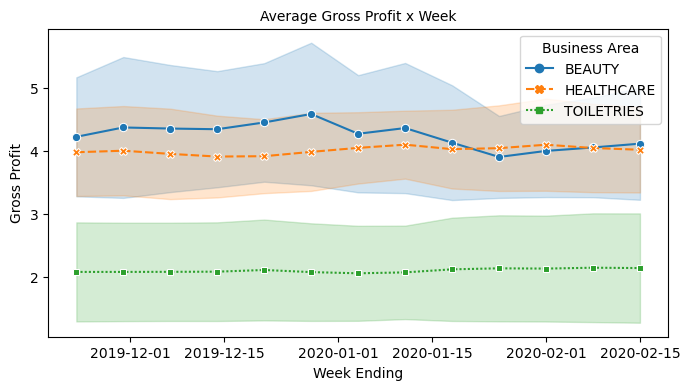

In [48]:
plt.figure(figsize=(8,4))
ax =sns.lineplot(x='Week Ending',y='Gross Profit',data=profit, hue='Business_Area', style='Business_Area', markers=True)
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')
plt.title("Average Gross Profit x Week", size=10)

#df.groupby('Week Ending')['Gross Profit'].mean().plot(kind = 'line', ylabel = 'Revenue',figsize = (8,3), title='Average Weekly Profit')

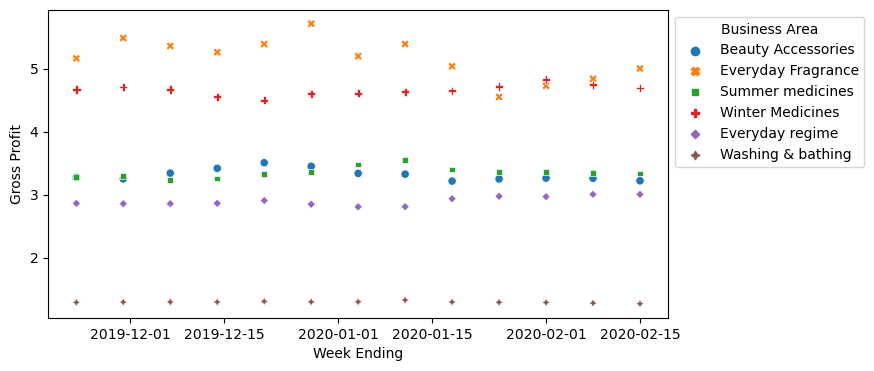

In [49]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Week Ending',y='Gross Profit',data=profit, hue='Category', style='Category')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')
plt.show()

### Plot per Store
##### Join main dataframe df with store_df to include store specific data.

In [51]:
#Merge master dataframe df wiht store_df 
new_df = df.merge(store_df, how='inner',left_on ='Store_ID', right_on='Store_ID')
#new_df.drop(columns={'Item'}, inplace=True)
new_df.head(4)

,Product_ID,Business_Area,Category,Cost_price,Retail_price,Store_ID,Week Ending,Sales Units,SL%,Revenue,Gross Profit,Store_format,Distribution_Centre,No. deliveries per week
0,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-23,4,1.0,0.0388,-2.2317,Flagship,NOTTM,6
1,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-11-30,1,1.0,0.0097,-2.2317,Flagship,NOTTM,6
2,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-07,2,1.0,0.0194,-2.2317,Flagship,NOTTM,6
3,Product 1,BEAUTY,Beauty Accessories,2.2414,0.0097,Store 1,2019-12-14,4,1.0,0.0388,-2.2317,Flagship,NOTTM,6


In [52]:


new_df['Distribution_Centre'].unique()

array(['NOTTM', 'BASGK', 'WARRN', 'THETF', 'BIRMH', 'PLYMH', 'BRADF',
       'BRUNS', 'SCOT', 'DAGHM', 'ALLNG', 'DUBLN', 'LEEDS2', 'BRIST',
       'COATB1', 'HEATH', 'PRESTA2', 'LETCA1', 'NEWCS1'], dtype=object)

In [53]:
new_df['Store_format'].unique()

array(['Flagship', 'H&B', 'Airport', 'LP'], dtype=object)

In [54]:
# Splitting df into christmas_df anf newyear_df
lastdate = pd.to_datetime("2019-12-31").date()
christmas_df=new_df[new_df['Week Ending'] <= lastdate]
newyear_df=new_df[new_df['Week Ending'] > lastdate]

### Christmas and New Year Data

In [55]:
new_palette={'Flagship':'Lime','Airport':'Green','H&B':'Navy','LP':'Blue'}

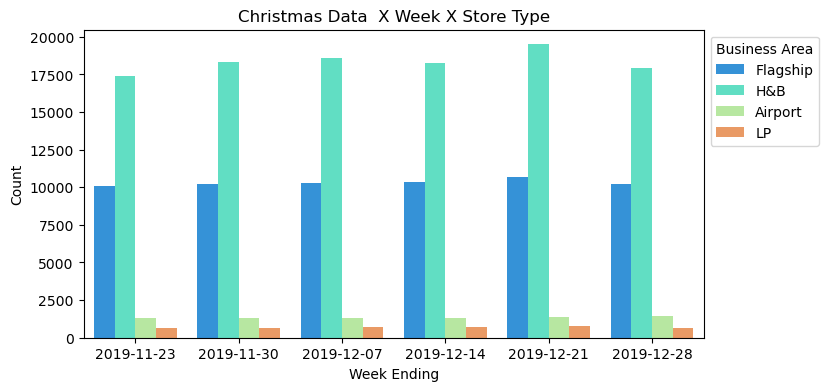

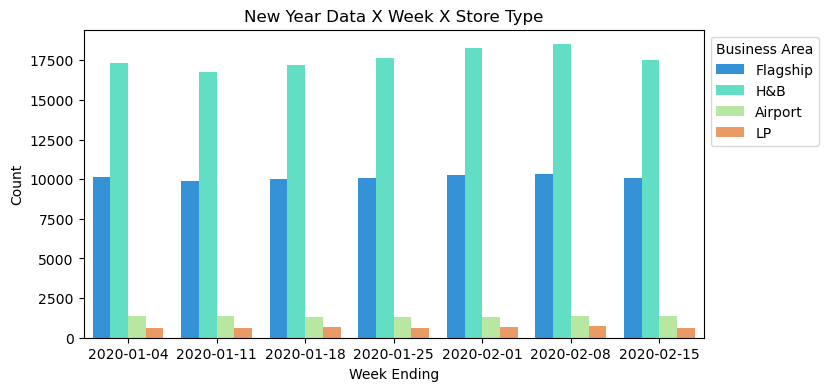

In [56]:
# Christmas Data
plt.figure(figsize=(8,4))
sns.countplot(x='Week Ending', hue='Store_format', data=christmas_df,palette='rainbow')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')
plt.xlabel('Week Ending')
plt.ylabel('Count')
plt.title('Christmas Data  X Week X Store Type')

#New Year Data
plt.figure(figsize=(8,4))
sns.countplot(x='Week Ending', hue='Store_format', data=newyear_df,palette='rainbow')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Business Area')
plt.xlabel('Week Ending')
plt.ylabel('Count')
plt.title('New Year Data X Week X Store Type')


plt.show()

<Figure size 800x400 with 0 Axes>

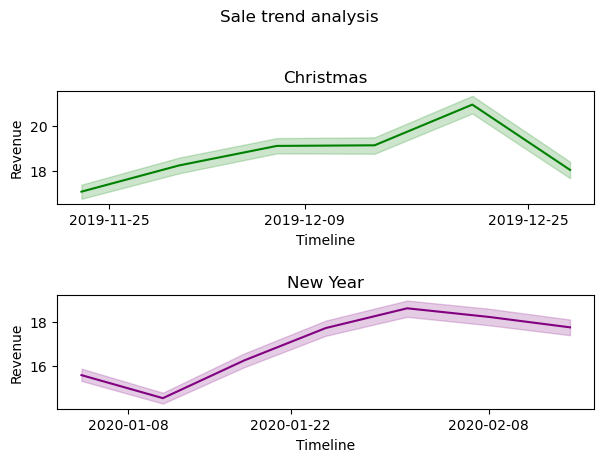

In [57]:
#Plot Revenue for Christmas and New Year Data
christmas_sale = christmas_df['Revenue'].sum()
newyear_sale = newyear_df['Revenue'].sum()

plt.figure(figsize=(8,4))

fig, axs = plt.subplots(nrows = 2)
sns.lineplot(x="Week Ending", y="Revenue", data=christmas_df, ax= axs[0], color='Green',markers=True)
axs[0].title.set_text("Christmas")
axs[0].set_xlabel("Timeline")
axs[0].set_ylabel("Revenue")
axs[0].set_xticks(axs[0].get_xticks()[::4])

sns.lineplot(x="Week Ending", y="Revenue", data=newyear_df, ax= axs[1], color = 'Purple',markers=True)
axs[1].title.set_text("New Year")
axs[1].set_xlabel("Timeline")
axs[1].set_ylabel("Revenue")
axs[1].set_xticks(axs[1].get_xticks()[::2]) 

fig.suptitle("Sale trend analysis ")
plt.tight_layout(pad=2)

plt.show()

### Perfomance Analysis based on Store Type

Ther are 4 store type:
Airport,
Flagship,
H&B,
LP.

In [58]:
store =  new_df[['Business_Area','Week Ending','Sales Units','SL%','Gross Profit','Store_format','Distribution_Centre','No. deliveries per week']]
store = store.groupby(['Store_format','Distribution_Centre','Business_Area','SL%'])['No. deliveries per week'].mean().to_frame()
store.reset_index(inplace=True)
store.sample(8)

,Store_format,Distribution_Centre,Business_Area,SL%,No. deliveries per week
1993,Flagship,BRADF,HEALTHCARE,0.413631,6.0
2879,Flagship,BRUNS,TOILETRIES,0.706748,6.0
3352,Flagship,DAGHM,BEAUTY,0.885478,6.0
7665,Flagship,NOTTM,BEAUTY,0.758315,6.0
17060,H&B,BIRMH,TOILETRIES,0.641270,6.0
516,Airport,HEATH,TOILETRIES,0.762735,6.0
15807,H&B,BIRMH,BEAUTY,0.884298,6.0
8225,Flagship,NOTTM,HEALTHCARE,0.818488,6.0


#### Store Perfomance Analysis

In [59]:
store_perform = store.groupby('Store_format')['SL%'].mean().to_frame()
store_perform.reset_index(inplace=True)
store_perform

,Store_format,SL%
0,Airport,0.790868
1,Flagship,0.803863
2,H&B,0.841298
3,LP,0.853149


In [60]:
#new_palette={'Flagship':'Lime','Airport':'Green','H&B':'Navy','LP':'Blue'}
sl_palette={'Flagship':'Green','Airport':'Blue','H&B':'Orange','LP':'Red'}

C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Average Stock Level% X Store Type')

<Figure size 800x400 with 0 Axes>

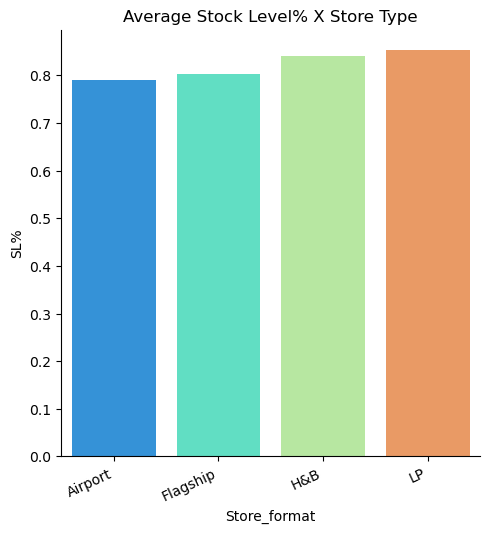

In [61]:
plt.figure(figsize=(8,4))
sns.catplot(x='Store_format',y='SL%',data = store_perform, kind='bar', palette='rainbow')
plt.xticks(rotation=25, horizontalalignment ='right')
plt.title("Average Stock Level% X Store Type")


All the store type as Average SL% around 0.8, which looks good.

In [62]:
store_delivery = store.groupby('Store_format')['No. deliveries per week'].mean().to_frame()
store_delivery.reset_index(inplace=True)
store_delivery

,Store_format,No. deliveries per week
0,Airport,6.000000
1,Flagship,6.000000
2,H&B,5.515772
3,LP,2.561006


C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


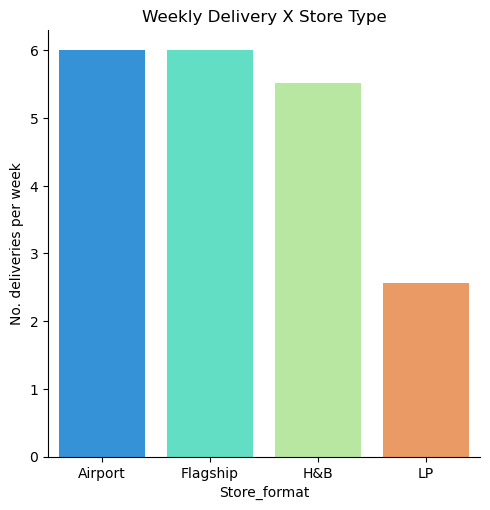

In [63]:
sns.catplot(data =store_delivery, x ='Store_format', y='No. deliveries per week',kind='bar', palette ='rainbow')
plt.title('Weekly Delivery X Store Type')
plt.show()

### Remove anomalies in SL% and Sales unit

In [64]:
#Choose stores wiht SL% > -2 to avoid anoamlies
filtered_store= new_df[(new_df['SL%'] > -2) &  (new_df['SL%'] < 4)].sort_values(by='SL%')
filtered_store.head(3)

,Product_ID,Business_Area,Category,Cost_price,Retail_price,Store_ID,Week Ending,Sales Units,SL%,Revenue,Gross Profit,Store_format,Distribution_Centre,No. deliveries per week
203460,Product 570,HEALTHCARE,Winter Medicines,0.0494,1.7363,Store 58,2020-02-15,-3,-1.461224,-5.2089,1.6869,H&B,BASGK,6
307680,Product 536,HEALTHCARE,Winter Medicines,4.4388,13.5800,Store 22,2019-12-14,-1,-0.837822,-13.5800,9.1412,H&B,THETF,6
126960,Product 55,BEAUTY,Beauty Accessories,0.2838,1.9400,Store 40,2020-01-25,-1,-0.677966,-1.9400,1.6562,Flagship,BRADF,6


C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


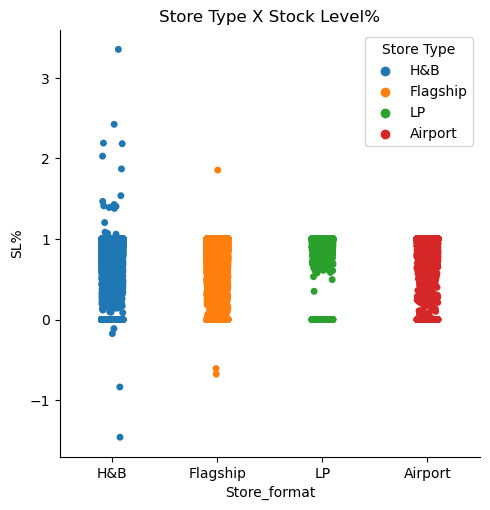

In [65]:
sns.catplot(data =filtered_store, x ='Store_format', y='SL%', hue='Store_format',kind='strip')
plt.title('Store Type X Stock Level%')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Store Type')
plt.show()

In [66]:
#sns.scatterplot(data =filtered_store, x ='No. deliveries per week', y='SL%', hue='Store_format')

In [67]:
unit_week = new_df.groupby(['Week Ending','Store_format'])['Sales Units'].mean().to_frame()
unit_week.reset_index(inplace=True)
unit_week

,Week Ending,Store_format,Sales Units
0,2019-11-23,Airport,14.389961
1,2019-11-23,Flagship,7.034493
2,2019-11-23,H&B,2.989821
3,2019-11-23,LP,1.453718
4,2019-11-30,Airport,13.866769
5,2019-11-30,Flagship,7.896104
6,2019-11-30,H&B,3.118308
7,2019-11-30,LP,1.352221
8,2019-12-07,Airport,14.829511
9,2019-12-07,Flagship,8.209327


C:\Users\babit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

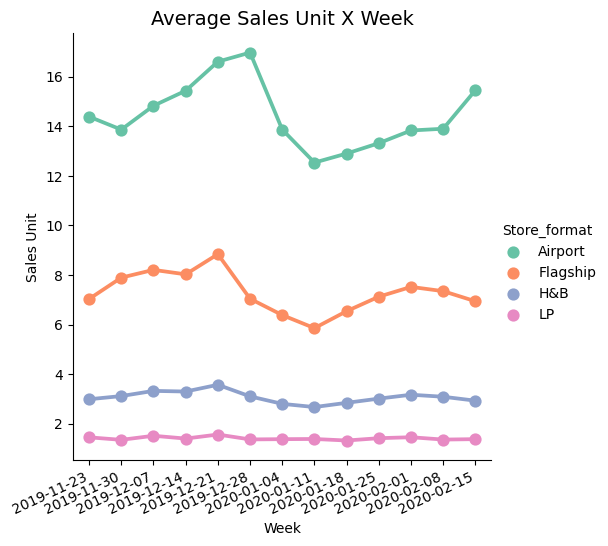

In [68]:
plt.figure(figsize=(8,4))
sns.catplot(x='Week Ending', y='Sales Units', hue='Store_format',data=unit_week,kind='point', palette =  'Set2')
plt.xlabel('Week')
plt.ylabel('Sales Unit')
plt.title('Average Sales Unit X Week', size=14)
plt.xticks(rotation=25, horizontalalignment ='right')
plt.show()

### Top 10 Stores by Sale

In [69]:
top10_stores= new_df.groupby('Store_ID')['Revenue'].mean().to_frame()
top10_stores.reset_index(inplace=True)
top10_stores=top10_stores.sort_values(by='Revenue', ascending=False).head(10)

<Figure size 800x400 with 0 Axes>

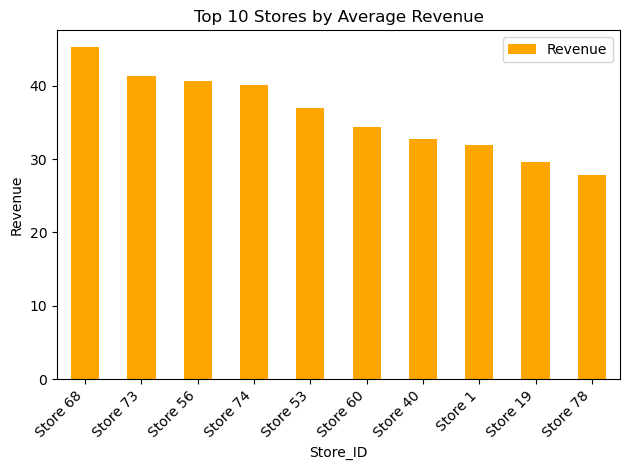

In [70]:
# Top 10 Stores

plt.figure(figsize=(8, 4))
top10_stores.plot(x='Store_ID', y ='Revenue',kind='bar',  color='orange')
plt.title('Top 10 Stores by Average Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Products by Sales Unit

In [71]:
top10_products = new_df.groupby('Product_ID')['Sales Units'].mean().to_frame()
top10_products.reset_index(inplace=True)
top10_products = top10_products.sort_values(by='Sales Units', ascending=False).head(10)

<Figure size 800x200 with 0 Axes>

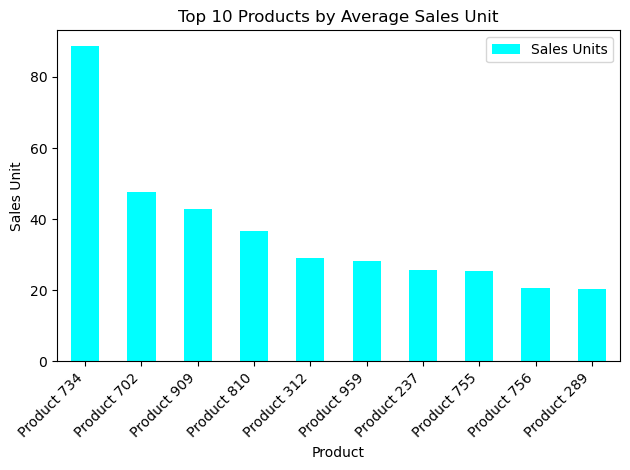

In [72]:
# Top 10 Products bu Sales Unit

plt.figure(figsize=(8, 2))
top10_products.plot(x ='Product_ID', y = 'Sales Units',kind='bar', color='cyan')
plt.title('Top 10 Products by Average Sales Unit')
plt.xlabel('Product')
plt.ylabel('Sales Unit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
top10_product_revenue= new_df.groupby('Product_ID')['Revenue'].mean().to_frame()
top10_product_revenue.reset_index(inplace=True)
top10_product_revenue=top10_product_revenue.sort_values(by='Revenue', ascending=False).head(10)

<Figure size 800x200 with 0 Axes>

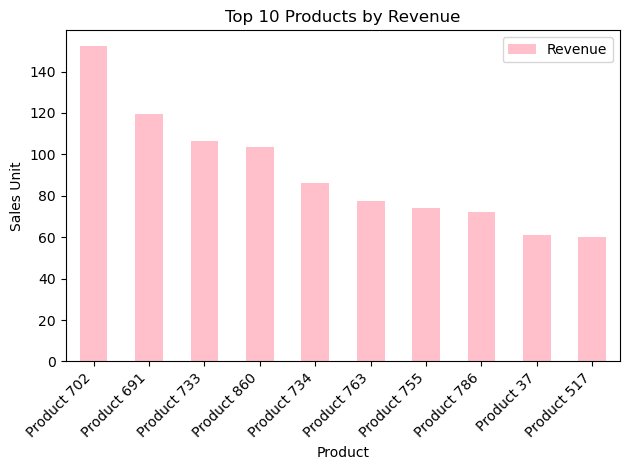

In [74]:
# Top 10 Products bu Sales Unit

plt.figure(figsize=(8, 2))
top10_product_revenue.plot(x ='Product_ID', y = 'Revenue',kind='bar', color='pink')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Sales Unit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
print(list(store_df.columns))

['Store_ID', 'Store_format', 'Distribution_Centre', 'No. deliveries per week']


In [59]:
store_df.Distribution_Centre.unique()

array(['NOTTM', 'BIRMH', 'LEEDS2', 'BASGK', 'WARRN', 'THETF', 'BRIST',
       'PLYMH', 'BRADF', 'BRUNS', 'SCOT', 'DAGHM', 'ALLNG', 'COATB1',
       'PRESTA2', 'LETCA1', 'NEWCS1', 'HEATH', 'DUBLN'], dtype=object)

In [60]:
centre_mapping = {
    'NOTTM': 'Nottingham',
    'BIRMH': 'Birmingham',
    'LEEDS2': 'Leeds',
    'BASGK': 'Basildon',
    'WARRN': 'Warwick',
    'THETF': 'Thetford',
    'BRIST': 'Bristol',
    'PLYMH': 'Plymouth',
    'BRADF': 'Bradford',
    'BRUNS': 'Brunswick',
    'SCOT': 'Scotland',
    'DAGHM': 'Dagenham',
    'ALLNG': 'Allington',
    'COATB1': 'Coatbridge',
    'PRESTA2': 'Prestatyn',
    'LETCA1': 'Letchworth',
    'NEWCS1': 'Newcastle',
    'HEATH': 'Heathrow',
    'DUBLN': 'Dublin'
}

store_df['Dist_Centre_Cities'] = store_df['Distribution_Centre'].map(centre_mapping)
cities = store_df['Dist_Centre_Cities'].unique()

In [61]:
import folium

# Latitude and longitude coordinates for each city
city_coordinates = {
    'Nottingham': (52.9548, -1.1581),
    'Birmingham': (52.4862, -1.8904),
    'Leeds': (53.8008, -1.5491),
    'Basildon': (51.5761, 0.4887),
    'Warwick': (52.2817, -1.5849),
    'Thetford': (52.4183, 0.748),
    'Bristol': (51.4545, -2.5879),
    'Plymouth': (50.3755, -4.1427),
    'Bradford': (53.7974, -1.7598),
    'Brunswick': (50.8251, 0.1588),
    'Scotland': (56.4907, -4.2026),
    'Dagenham': (51.5459, 0.1337),
    'Allington': (51.2827, 0.2877),
    'Coatbridge': (55.862, -4.0282),
    'Prestatyn': (53.3386, -3.4084),
    'Letchworth': (51.9791, -0.2266),
    'Newcastle': (54.9783, -1.6174),
    'Heathrow': (51.4700, -0.4543),
    'Dublin': (53.3498, -6.2603)
}


m = folium.Map(location=[sum([coord[0] for coord in city_coordinates.values()]) / len(city_coordinates),
                         sum([coord[1] for coord in city_coordinates.values()]) / len(city_coordinates)],
               zoom_start=5)

for city, coords in city_coordinates.items():
    folium.Marker(location=coords, popup=city).add_to(m)
m

In [71]:
#from geopy.geocoders import Photon
#geolocator = Photon(user_agent= "geoapiExercises")#"measurements")

geolocator = Nominatim(user_agent="geoapiExercises")

def get_lat_lon(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

store_df['Latitude'], store_df['Longitude'] = zip(*store_df['Dist_Centre_Cities'].apply(get_lat_lon))

In [69]:
# Brunswick stores are worng 
store_df.loc[store_df['Dist_Centre_Cities'] == 'Brunswick', ['Latitude', 'Longitude']] = (50.8251, 0.1588)

C:\Users\babit\AppData\Local\Temp\ipykernel_2948\2573140965.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


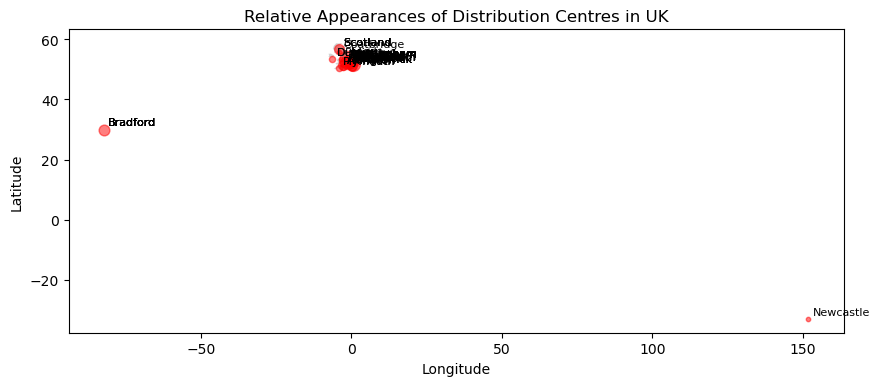

In [70]:
city_counts = store_df['Dist_Centre_Cities'].value_counts()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
uk = world[world['name'] == 'United Kingdom']

fig, ax = plt.subplots(figsize=(10, 6))
uk.plot(ax=ax, color='lightgrey')

for city, count in city_counts.items():
    city_geo = gpd.GeoSeries([Point(store_df.loc[store_df['Dist_Centre_Cities'] == city, 'Longitude'].iloc[0], 
                                     store_df.loc[store_df['Dist_Centre_Cities'] == city, 'Latitude'].iloc[0])])
    city_geo.plot(ax=ax, markersize=count*10, color='red', alpha=0.5)

for idx, row in store_df.iterrows():
    plt.annotate(text=row['Dist_Centre_Cities'], xy=(row['Longitude'], row['Latitude']),
                 xytext=(3, 3), textcoords='offset points', fontsize=8)

plt.title('Relative Appearances of Distribution Centres in UK')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


# Insights and Findings

Analysis on inventory shows that 50% of the stock is the product category Toiletries,30% is Health and 20% the beauty products.


Category of products most sold are Everyday Regime and least sold are Everyday Fragrance.
Promotions and discounts on beauty products could be introduced to promote Sales.

Seasonal Trend - Average revenue generated was peaked during christmas holidays and dropped drastically by 2nd week of Jan 2020, for Flagship and Airport stores.
While H&B, LP stores have steady sale during the period under consideration.

Product Category - Promote the sale of everyday fragrance which is lowest in sale units, and has proven to be the highest profitable category. Promote sale on the same by adverts on offer and discounts.


Stock Level% -  LP stores stock level below 80% to be improved,  applying discounts and promotions on low moving products.
There are products with SL% less than 0.4 and above 0.8 , raising serious concerts on overstocking and understocking.

94.5% of products in various stores are under stock and require immediate replenishment.  3.5% of products is overstocked.



# Conclusion and Recommendations

Analysis performed prominently on grouped data such as category  and Store type could be performed on individual product or store, for detailed analysis.





Seasonal variation in sales shows peak in sale units  during holiday weeks.
Hence cah prepare the stock ready and frequent deliveries for this period.


Promotion and discounts on low moving products need to be applied to reduce holding cost.  Plan future  ordering of the products based on demand.


LP and H&B store types need to be focussed on improving sales, service and identify products  oh high demand.


